**Question:** Write a program to implement the naïve Bayesian classifier for a sample training data set stored as a .CSV file. Compute the accuracy of the classifier, considering few test data sets.

**Program**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Importing the necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Titanic Dataset is used from kaggle for classifying where a person will survive or not using Bayesian Classifier.

In [ ]:
ds=pd.read_csv(r'/content/gdrive/MyDrive/ml datasets/titanic ds/train (1).csv') # dataset is imported 
print(ds)

     PassengerId  Survived  Pclass  ...     Fare Cabin  Embarked
0              1         0       3  ...   7.2500   NaN         S
1              2         1       1  ...  71.2833   C85         C
2              3         1       3  ...   7.9250   NaN         S
3              4         1       1  ...  53.1000  C123         S
4              5         0       3  ...   8.0500   NaN         S
..           ...       ...     ...  ...      ...   ...       ...
886          887         0       2  ...  13.0000   NaN         S
887          888         1       1  ...  30.0000   B42         S
888          889         0       3  ...  23.4500   NaN         S
889          890         1       1  ...  30.0000  C148         C
890          891         0       3  ...   7.7500   NaN         Q

[891 rows x 12 columns]


**1. Data Exploration**

In [ ]:
ds.info() # to find detail about the column 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# To get statistics for all the columns at the same time
ds.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
ds.shape # returns a tuple containing the dimensions (rows x columns) of a dataframe.

(891, 12)

In [ ]:
ds.max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                     80
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                               512.329
dtype: object

In [ ]:
ds.mean()

Survived     0.672131
Pclass       1.191257
Sex          0.519126
Age         35.661202
SibSp        0.464481
Parch        0.475410
Fare        78.273224
Cabin       68.628415
Embarked     1.278689
dtype: float64

In [ ]:
ds.median()

Survived     1.0
Pclass       1.0
Sex          1.0
Age         36.0
SibSp        0.0
Parch        0.0
Fare        57.0
Cabin       68.0
Embarked     2.0
dtype: float64

In [ ]:
ds.skew() #skewness

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64

In [ ]:
ds.kurtosis() #kurtosis

PassengerId    -1.200000
Survived       -1.775005
Pclass         -1.280015
Age             0.178274
SibSp          17.880420
Parch           9.778125
Fare           33.398141
dtype: float64

In [ ]:
cr = ds.corr() #correlation between two coloumns
print(cr)

             PassengerId  Survived    Pclass  ...     SibSp     Parch      Fare
PassengerId     1.000000 -0.005007 -0.035144  ... -0.057527 -0.001652  0.012658
Survived       -0.005007  1.000000 -0.338481  ... -0.035322  0.081629  0.257307
Pclass         -0.035144 -0.338481  1.000000  ...  0.083081  0.018443 -0.549500
Age             0.036847 -0.077221 -0.369226  ... -0.308247 -0.189119  0.096067
SibSp          -0.057527 -0.035322  0.083081  ...  1.000000  0.414838  0.159651
Parch          -0.001652  0.081629  0.018443  ...  0.414838  1.000000  0.216225
Fare            0.012658  0.257307 -0.549500  ...  0.159651  0.216225  1.000000

[7 rows x 7 columns]


In [ ]:
ds["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

2.Visulaisation

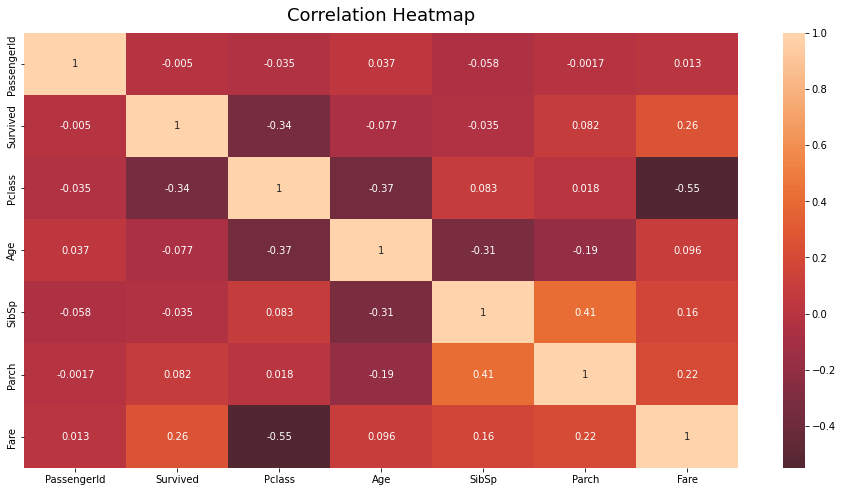

In [ ]:
plt.figure(figsize=(16, 8))
heatmap = sns.heatmap(cr, center=-1, annot = True) # by default pearson correlation
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
ag = pd.cut(ds['Age'], bins=[0, 20, 40, 60, 81])

In [ ]:
dk=ds.groupby(ag).Survived.mean() # grouped the high column data according to year to draw pie chart
print(dk)

Age
(0, 20]     0.458101
(20, 40]    0.397403
(40, 60]    0.390625
(60, 81]    0.227273
Name: Survived, dtype: float64


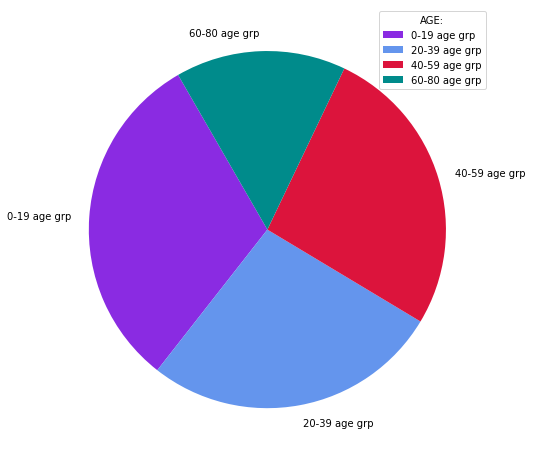

In [ ]:
label=['0-19 age grp','20-39 age grp','40-59 age grp','60-80 age grp']
color=['#8A2BE2','#6495ED','#DC143C','#008B8B']
plt.pie(dk, startangle = 120, labels=label, colors = color)
plt.legend(title = "AGE:")
plt.rcParams["figure.figsize"] = (8,10)
plt.show()

In [ ]:
dg=ds.groupby(['Sex']).Survived.mean() # grouped the high column data according to year to draw pie chart
print(dg)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


Text(0.5, 1.0, 'Survival rate by Gender')

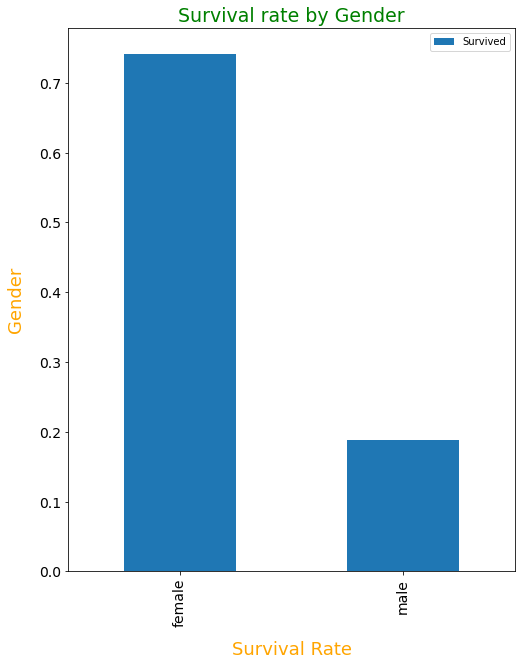

In [ ]:
dg.plot(kind = 'bar',legend='reverse',fontsize=14)
plt.ylabel("Gender", labelpad=14, fontsize=18, color='orange')
plt.xlabel("Survival Rate", labelpad=14, fontsize=18, color='orange')
plt.title(label="Survival rate by Gender",fontsize=19, color='green')

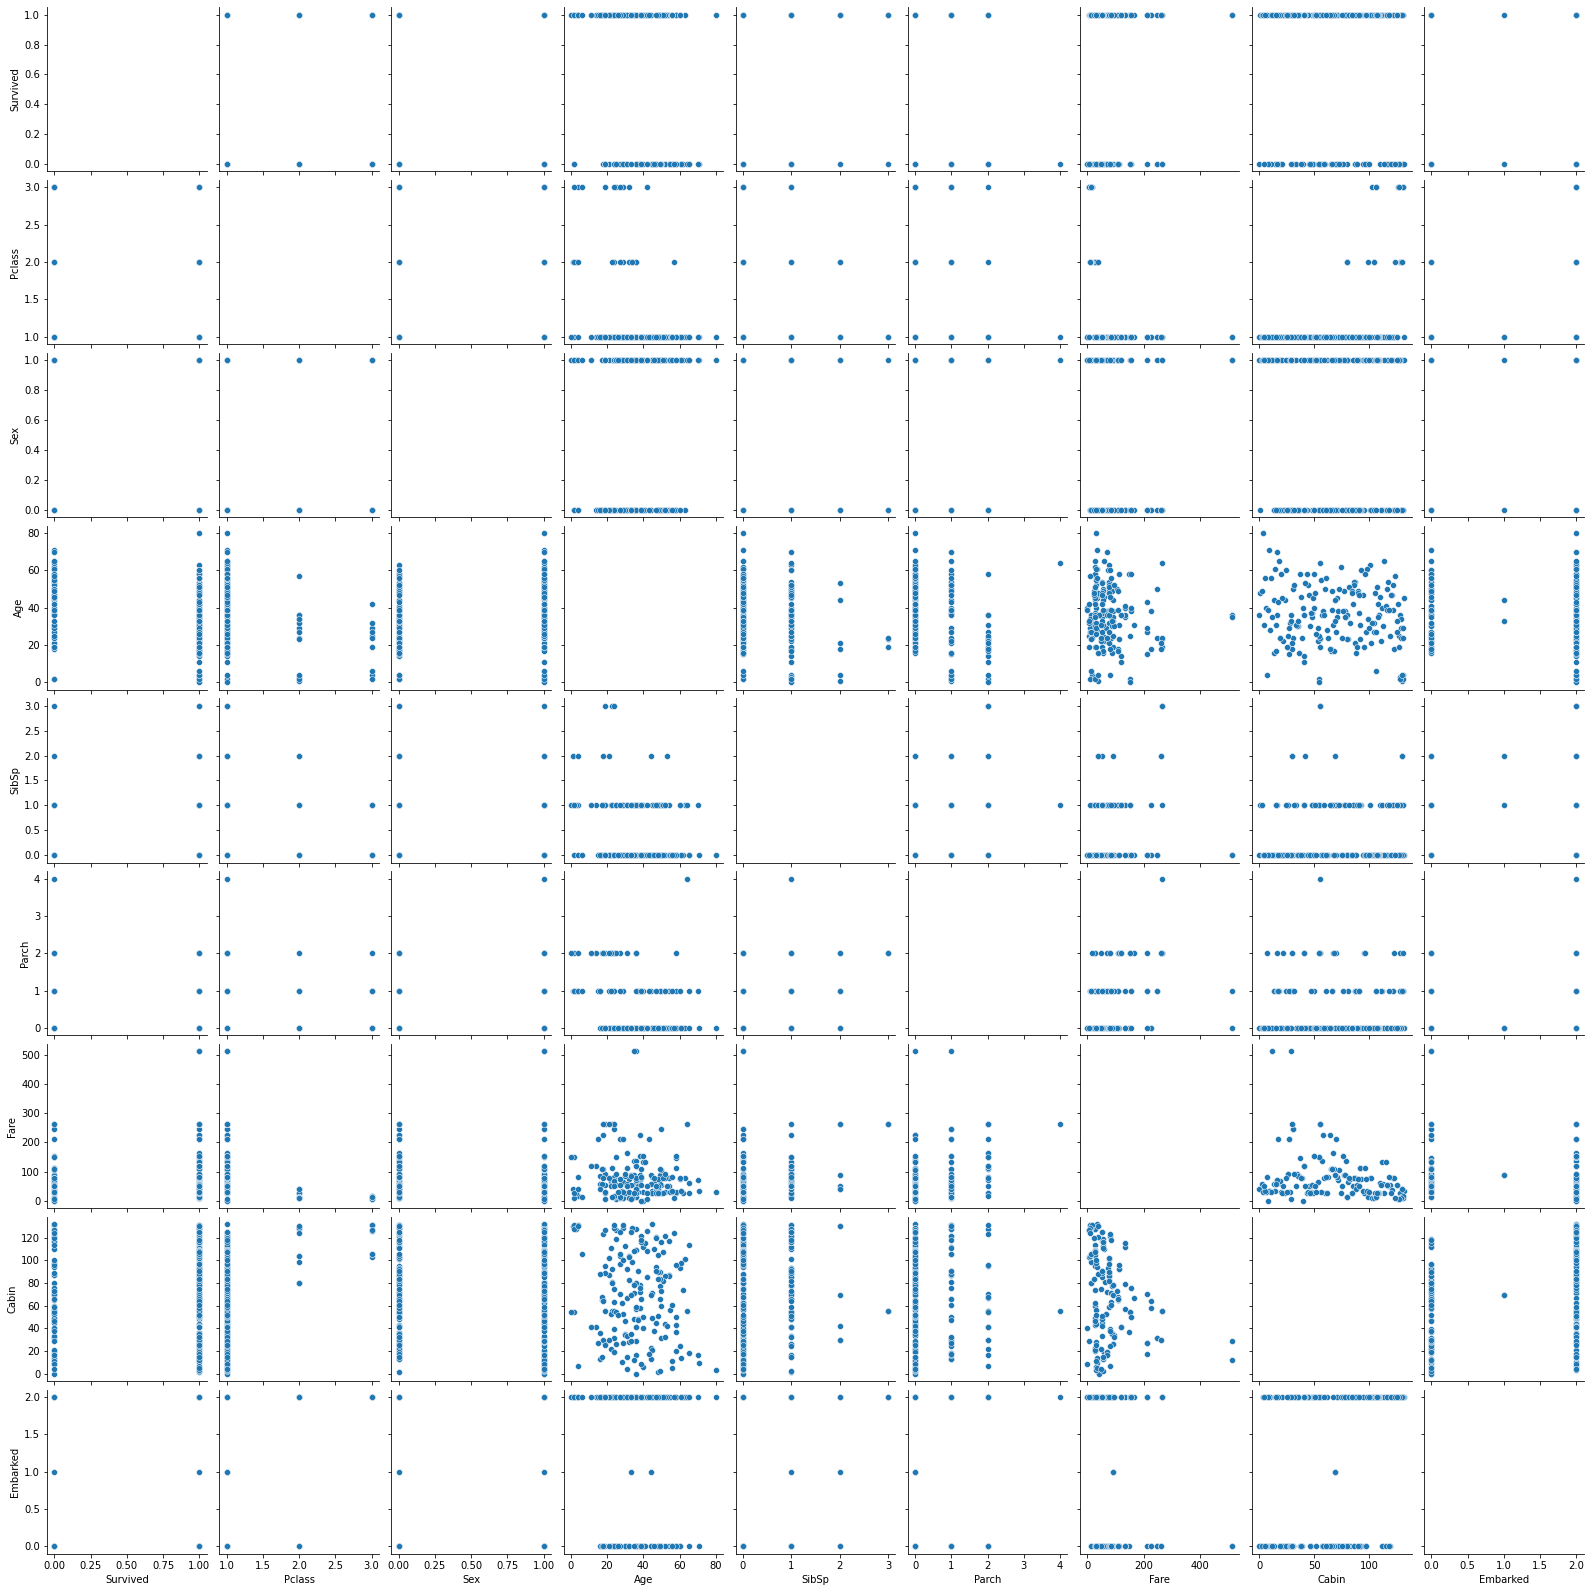

In [ ]:
sns.pairplot(ds, diag_kind ='scatter')

3.Data Preparation 

In [ ]:
ds.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
ds.nunique() # to find no. of unique value in each column

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [ ]:
ds.isnull().sum() #to check if any null value is there

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
ds[ds.duplicated(keep=False)] # to check for duplicate value

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [ ]:
#Removing Max Unique data columns PassengerID, Name, Ticket
#Removing rows with blank values
ds = ds.dropna(subset = ['Embarked' , 'Age', 'Cabin'])
ds = ds.drop(['PassengerId' , 'Name' , 'Ticket'],axis=1)

In [ ]:
#Converting float data type into int data type
ds['Fare'] = ds['Fare'].astype(int)
ds['Age'] = ds['Age'].astype(int)

In [ ]:
s_col = ds.select_dtypes(include='object')
print(s_col)
s_col.info()

        Sex        Cabin Embarked
1    female          C85        C
3    female         C123        S
6      male          E46        S
10   female           G6        S
11   female         C103        S
..      ...          ...      ...
871  female          D35        S
872    male  B51 B53 B55        S
879  female          C50        C
887  female          B42        S
889    male         C148        C

[183 rows x 3 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 183 entries, 1 to 889
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sex       183 non-null    object
 1   Cabin     183 non-null    object
 2   Embarked  183 non-null    object
dtypes: object(3)
memory usage: 5.7+ KB


In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for c in s_col:
    ds[c] = label.fit_transform(ds[c])

In [ ]:
ds.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
1,1,1,0,38,1,0,71,72,0
3,1,1,0,35,1,0,53,48,2
6,0,1,1,54,0,0,51,117,2
10,1,3,0,4,1,1,16,131,2
11,1,1,0,58,0,0,26,43,2


#4.Build model

In [ ]:
#Splitting the data into independent variable 'X' and dependent variable 'Y'
X= ds.iloc[:,1:8].values
Y = ds.iloc[:,0].values

In [ ]:
#Building train and test dataset  
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

In [ ]:
#Feature scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.fit_transform(x_test)

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Predict the response for test dataset
nbpred = nb.predict(X_test)
nbpred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0])

Evaluation Metrics

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
print("Accuracy:\n",accuracy_score(y_test, nbpred))
print("-------------")
print("Precision:\n",precision_score(y_test, nbpred))
print("-------------")
print("Recall:\n",recall_score(y_test, nbpred))
print("-------------")
print('Confusion Matrix:')
confusion_matrix(y_test, nbpred)

Accuracy:
 0.7636363636363637
-------------
Precision:
 0.8666666666666667
-------------
Recall:
 0.7428571428571429
-------------
Confusion Matrix:


array([[16,  4],
       [ 9, 26]])

**Inference: to find accuracy**
###**Accuracy:0.7636363636363637**


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
kfold_cv = KFold(n_splits=10, random_state=45, shuffle=True)
kfold_scores = cross_val_score(nb,X_train, y_train, cv = kfold_cv)
print("k-fold score -",kfold_scores)
print("\n------------\n")
cross_validation_accuracy = np.mean(kfold_scores)
print("Cross Validation Accuracy -",cross_validation_accuracy)

k-fold score - [0.61538462 0.69230769 0.53846154 0.69230769 0.76923077 0.46153846
 0.76923077 0.92307692 0.66666667 0.66666667]

------------

Cross Validation Accuracy - 0.6794871794871795


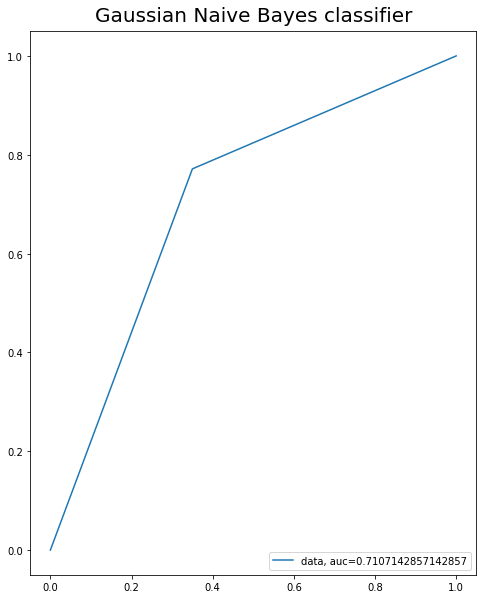

In [ ]:
from sklearn.metrics import roc_curve,roc_auc_score

t_fpr, t_tpr, _ = roc_curve(y_test, fpred)
t_auc = roc_auc_score(y_test, fpred)
plt.plot(t_fpr,t_tpr,label="data, auc="+str(t_auc))
plt.legend(loc=4)
plt.title('Gaussian Naive Bayes classifier',fontdict={'fontsize':20},pad=10)
plt.show()

In [115]:
t_auc #roc curve accuracy

0.7107142857142857

**Result:**The gaussian naive bayes classifier was used to classify whether a person will survive or not with 
*   Accuracy:
 0.7636363636363637
*   Precision:
 0.8666666666666667
*   Recall:
 0.7428571428571429
*  Confusion Matrix: array([[16,  4],[ 9, 26]]) 
* Cross Validation Accuracy - 0.6794871794871795
* roc curve with accuracy 0.7107142857142857

